In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
#load data
insurance_dataset = pd.read_csv('data/insurance.csv')

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#show the number of rows and columns
insurance_dataset.shape

(1338, 7)

In [5]:
#getting some information about the data
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


categorical features:
1.region
2.sex
3.smoker

In [6]:
#check for missing values
insurance_dataset.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data analysis

In [7]:
#statistical measures of the data
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


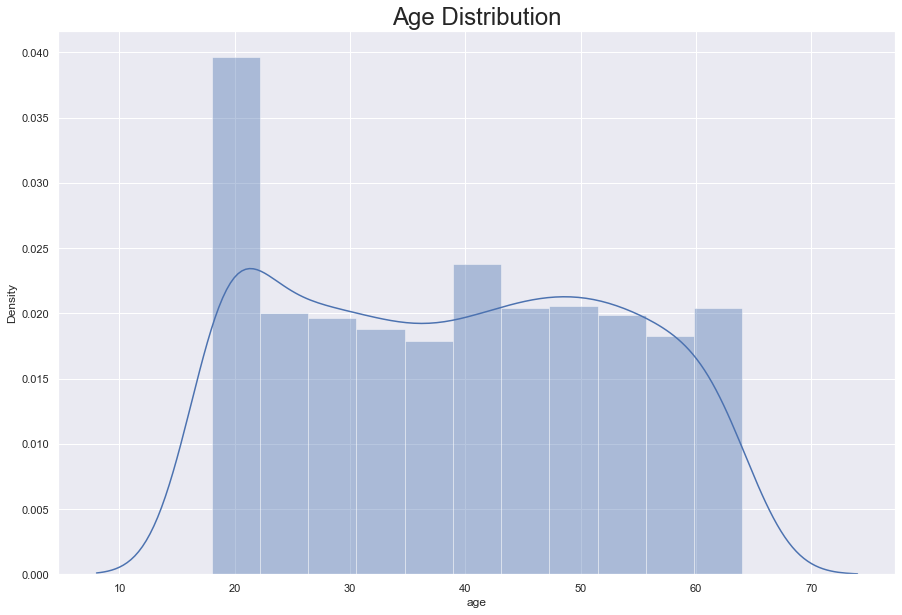

In [8]:
#distribution of age
sns.set()
plt.figure(figsize=(15,10))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution', fontsize=24)
plt.show()

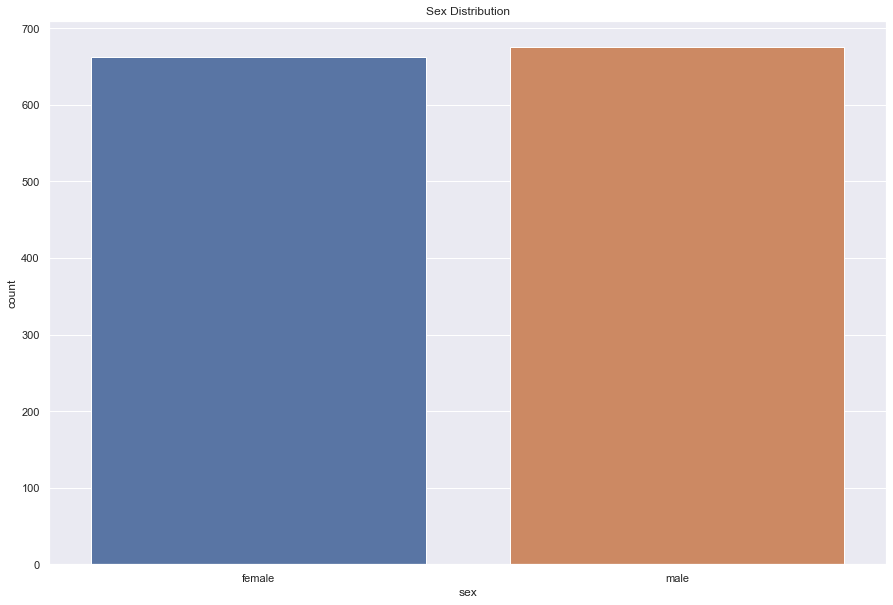

In [9]:
#distribution of gender
plt.figure(figsize=(15,10))
sns.countplot(x='sex', data=insurance_dataset)#using countplot instead of dist coz we dealing with a categor
plt.title('Sex Distribution')
plt.show()

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


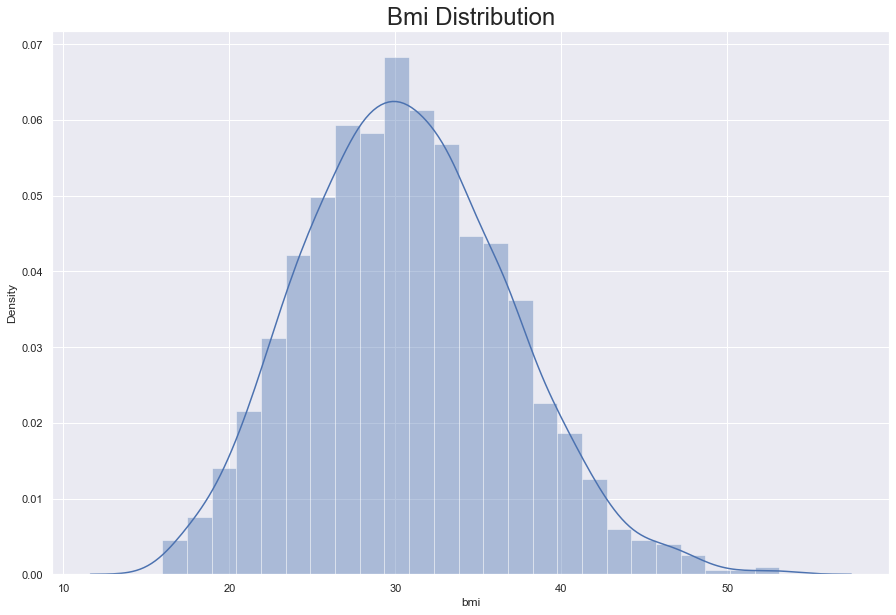

In [10]:
#check distribution of bmi
# sns.set()
plt.figure(figsize=(15,10))
sns.distplot(insurance_dataset['bmi'])
plt.title('Bmi Distribution', fontsize=24)
plt.show()

#normal bmi range of a normal person is in range [18.5, 24.9] so it would seem most people in our dataset 
are overweight

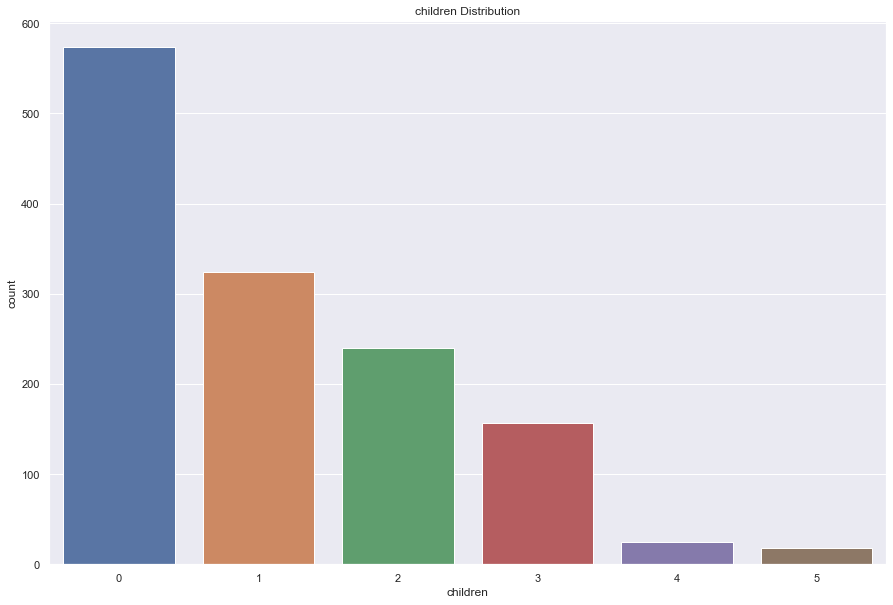

In [11]:
#distribution of children
plt.figure(figsize=(15,10))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children Distribution')
plt.show()

In [12]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

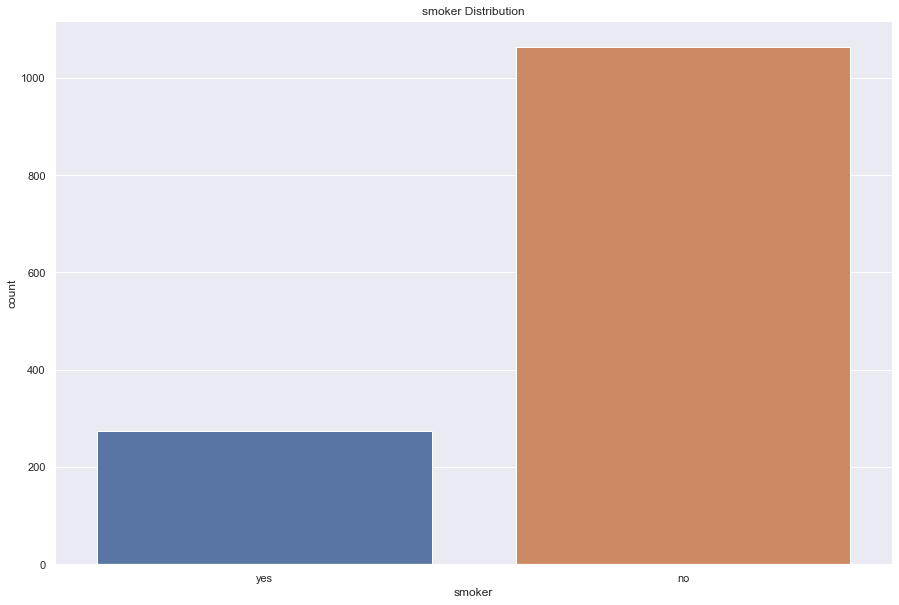

In [13]:
#distribution of smoker
plt.figure(figsize=(15,10))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker Distribution')
plt.show()

In [14]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

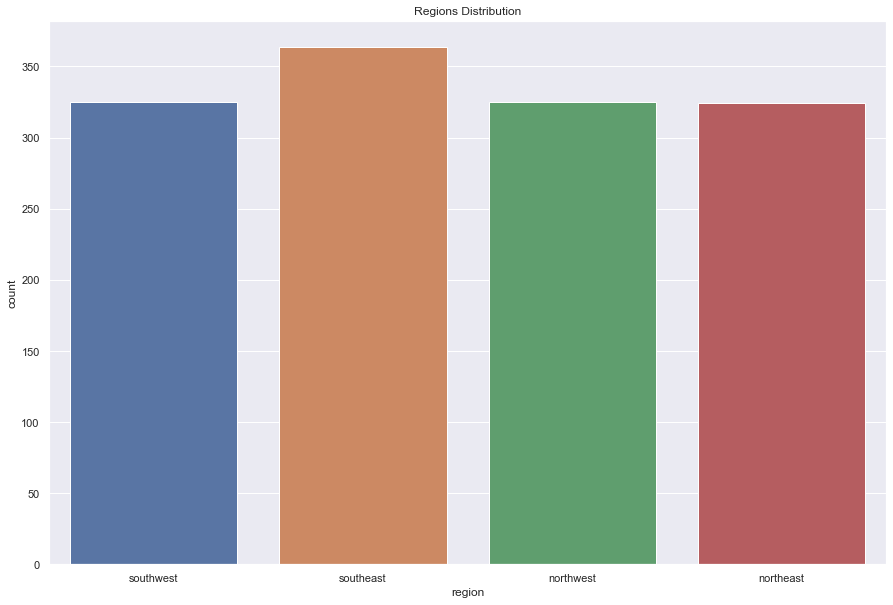

In [15]:
#distribution of region
plt.figure(figsize=(15,10))
sns.countplot(x='region', data=insurance_dataset)
plt.title('Regions Distribution')
plt.show()

In [16]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


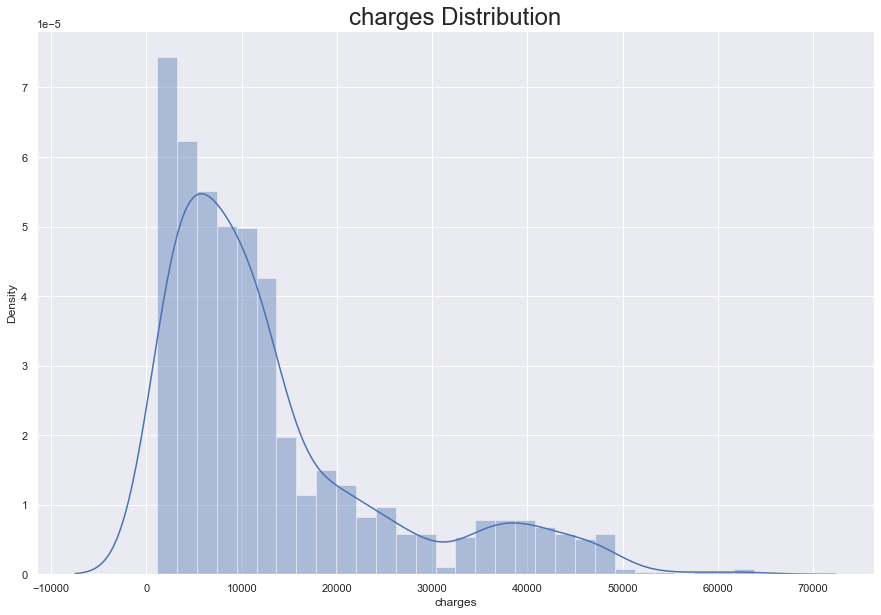

In [17]:
#distribution of charges
sns.set()
plt.figure(figsize=(15,10))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution', fontsize=24)
plt.show()

#encoding categorical data

In [18]:

#encoding sex column
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)


#encoding region column
insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace=True)


In [19]:
#encoding smoker column
insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)


In [20]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [21]:
#splitting the data into features and labels
X = insurance_dataset.drop(['charges'], axis=1)
y = insurance_dataset['charges']

In [22]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [23]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [24]:
#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [25]:
#training the model	
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [26]:
#model evaluation
#training data prediction
training_data_prediction = regressor.predict(X_train)
training_accuracy = metrics.r2_score(y_train, training_data_prediction)

In [27]:
print('R squared value:', training_accuracy)

R squared value: 0.751505643411174


In [28]:
#testing data prediction
testing_data_prediction = regressor.predict(X_test)
testing_accuracy = metrics.r2_score(y_test, testing_data_prediction)

In [29]:
print('R squared value:', testing_accuracy)

R squared value: 0.7447273869684077


make our system

In [30]:
# input_data = (19, 1, 27.9, 0, 1)
# input_data = (19,1,27.9,0,0,1)
input_data = (31,1,25.74,0,1,0)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print('The insurance cost is USD ', prediction[0])



The insurance cost is USD  3760.0805764960496


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


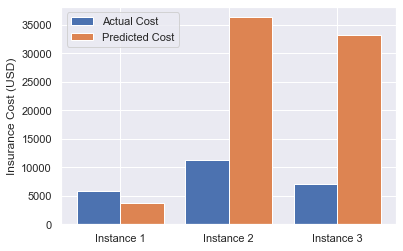

In [31]:
# Define a few sample instances
instances = [
    [31, 1, 25.74, 0, 1, 0],  # instance 1
    [57, 1, 31.54, 0, 0, 1],  # instance 2
    [41, 0, 29.64, 3, 0, 0],  # instance 3
]

# Get the predicted insurance costs for each instance
predicted_costs = []
for instance in instances:
    instance_reshaped = np.asarray(instance).reshape(1, -1)
    predicted_cost = regressor.predict(instance_reshaped)
    predicted_costs.append(predicted_cost[0])

# Define the actual insurance costs for each instance
actual_costs = [5836.5204, 11305.93455, 7003.2209]

# Plot the bar graph
fig, ax = plt.subplots()
ax.bar(np.arange(len(instances))-0.2, actual_costs, width=0.4, label='Actual Cost')
ax.bar(np.arange(len(instances))+0.2, predicted_costs, width=0.4, label='Predicted Cost')
ax.set_xticks(np.arange(len(instances)))
ax.set_xticklabels(['Instance 1', 'Instance 2', 'Instance 3'])
ax.set_ylabel('Insurance Cost (USD)')
ax.legend()
plt.show()


In [32]:
#saving the model
import pickle
with open('insurance_cost_prediction_model.pkl', 'wb') as file:
    pickle.dump(regressor, file)

    